In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
# make_classification generates a synthetic dataset with 1000 samples and 20 features, of which 10 are informative and 5 are redundant.
from sklearn.datasets import make_classification 
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1) 

In [15]:
X

array([[-0.20245394,  0.75116708, -1.5118818 , ..., -1.56978108,
         0.6370882 , -0.46505859],
       [-0.2933976 , -0.4618495 , -1.03503817, ..., -1.36749482,
         0.77655426, -0.30663438],
       [-0.23353927,  1.59413738, -0.24302373, ..., -1.25174607,
         0.64451726,  0.74205658],
       ...,
       [-0.75281067,  0.38551581, -0.68063573, ..., -2.83546116,
         1.88364956,  2.60755891],
       [-0.19983642,  0.40406811,  0.1310922 , ..., -1.28099316,
         0.5854406 , -0.76433963],
       [-0.01938808, -2.10390849, -0.73355857, ...,  0.05138838,
         0.0283964 ,  0.40036396]])

In [10]:
# Creating a DataFrame with features and target variable
data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
# Add the target variable as a separate column
data['target']= y   
# Now you can work with data as a DataFrame
data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,-0.202454,0.751167,-1.511882,0.213769,1.630152,1.346480,0.509842,-1.053533,-1.081661,0.681781,...,0.255484,-0.967784,1.201209,0.870392,-1.412459,1.619429,-1.569781,0.637088,-0.465059,0
1,-0.293398,-0.461850,-1.035038,-1.438745,-0.475255,0.907969,0.060521,-0.764904,-0.691158,0.242850,...,-0.101734,-1.300474,0.501156,0.370749,-1.778318,1.343988,-1.367495,0.776554,-0.306634,0
2,-0.233539,1.594137,-0.243024,-0.521316,-1.405258,0.910422,0.170205,-0.745909,-0.707808,0.327360,...,0.003929,-1.819449,0.253314,0.455330,0.297799,1.250208,-1.251746,0.644517,0.742057,0
3,-0.449354,0.457298,0.333863,-0.823251,1.428931,0.713167,-0.347749,-0.676813,-0.489517,-0.111904,...,-0.462263,0.868201,-1.060633,-0.010449,-0.511033,1.407223,-1.505204,1.094073,0.846864,0
4,-0.538559,0.919059,0.140802,-2.017550,0.561341,1.762362,0.173310,-1.473935,-1.349069,0.514124,...,-0.143451,-0.416811,0.522126,0.762236,-0.044134,2.559005,-2.593398,1.438896,1.562432,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   1000 non-null   float64
 1   feature_1   1000 non-null   float64
 2   feature_2   1000 non-null   float64
 3   feature_3   1000 non-null   float64
 4   feature_4   1000 non-null   float64
 5   feature_5   1000 non-null   float64
 6   feature_6   1000 non-null   float64
 7   feature_7   1000 non-null   float64
 8   feature_8   1000 non-null   float64
 9   feature_9   1000 non-null   float64
 10  feature_10  1000 non-null   float64
 11  feature_11  1000 non-null   float64
 12  feature_12  1000 non-null   float64
 13  feature_13  1000 non-null   float64
 14  feature_14  1000 non-null   float64
 15  feature_15  1000 non-null   float64
 16  feature_16  1000 non-null   float64
 17  feature_17  1000 non-null   float64
 18  feature_18  1000 non-null   float64
 19  feature_19  1000 non-null   

In [22]:
# PolynomialFeatures generates polynomial and interaction features of the specified degree.
# The transformed features are stored in a new DataFrame, df_poly, and the target variable is added.
from sklearn.preprocessing import PolynomialFeatures
# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(data.drop('target', axis=1))
poly_features = poly.get_feature_names_out(data.drop('target', axis=1).columns)

df_poly = pd.DataFrame(X_poly, columns=poly_features)
df_poly['target'] = y

print("Original features shape:", data.shape)
print("Polynomial features shape:", df_poly.shape)

Original features shape: (1000, 21)
Polynomial features shape: (1000, 231)


### Feature selection.

In [23]:
# Univariate Selection
# SelectKBest with chi2 is used to select the top 10 features.
# The selected features are stored in selected_features.
from sklearn.feature_selection import SelectKBest, f_classif

# Univariate feature selection
X = df_poly.drop('target', axis=1)
y = df_poly['target']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]

print("Selected features:", selected_features)


Selected features: Index(['feature_6^2', 'feature_6 feature_9', 'feature_6 feature_11',
       'feature_6 feature_14', 'feature_9^2', 'feature_9 feature_11',
       'feature_9 feature_14', 'feature_11^2', 'feature_11 feature_14',
       'feature_14^2'],
      dtype='object')


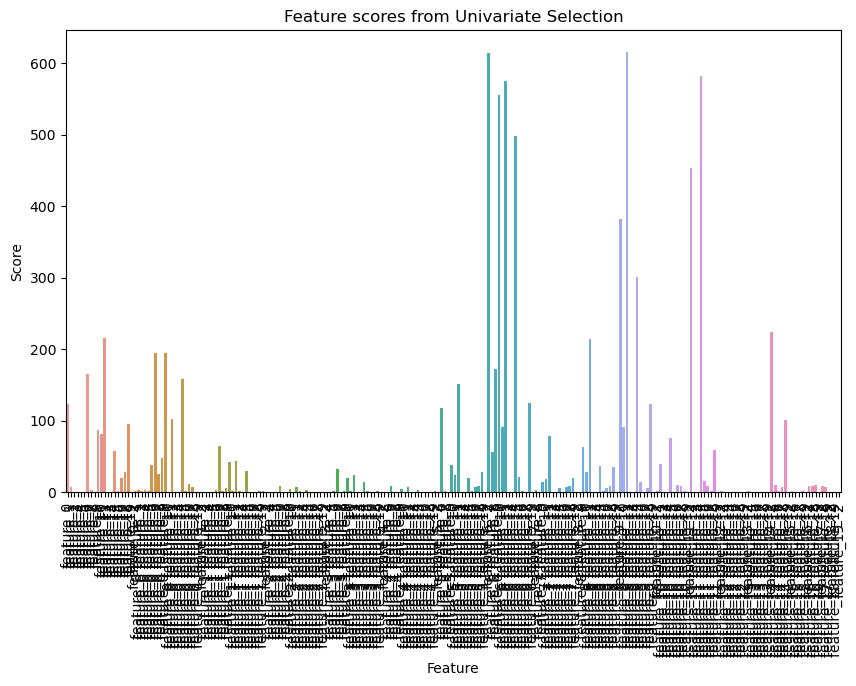

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the scores for each feature
scores = selector.scores_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=scores)
plt.xticks(rotation=90)
plt.title("Feature scores from Univariate Selection")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.show()


In [24]:
# RFE with a LogisticRegression estimator is used to recursively eliminate features until the top 10 are selected.
# The selected features are stored in selected_features_rfe.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_]

print("Selected features with RFE:", selected_features_rfe)


Selected features with RFE: Index(['feature_6', 'feature_9', 'feature_10', 'feature_11', 'feature_14',
       'feature_18', 'feature_1 feature_6', 'feature_1 feature_11',
       'feature_14 feature_18', 'feature_16^2'],
      dtype='object')


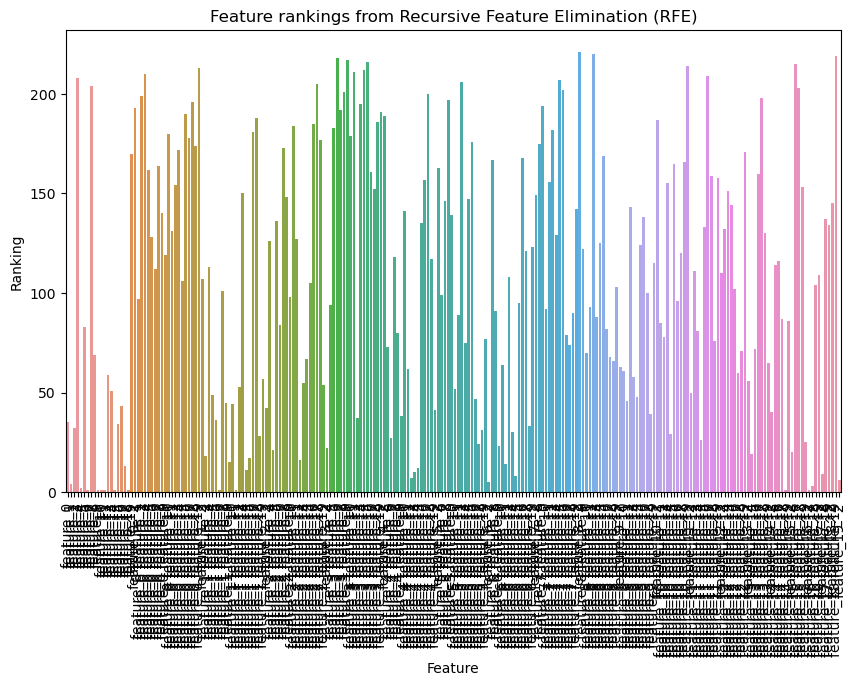

In [28]:
# Plotting the ranking for each feature
rfe_ranking = fit.ranking_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=rfe_ranking)
plt.xticks(rotation=90)
plt.title("Feature rankings from Recursive Feature Elimination (RFE)")
plt.xlabel("Feature")
plt.ylabel("Ranking")
plt.show()


In [25]:
# Feature Importance from Tree-based Models
# RandomForestClassifier is used to compute feature importances.
# The indices of the top 10 features are determined and stored in selected_features_rf.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]

selected_features_rf = X.columns[indices]

print("Selected features with Random Forest:", selected_features_rf)

Selected features with Random Forest: Index(['feature_7 feature_10', 'feature_10', 'feature_18', 'feature_0',
       'feature_6', 'feature_8 feature_10', 'feature_5 feature_18',
       'feature_5 feature_10', 'feature_11', 'feature_0 feature_8'],
      dtype='object')


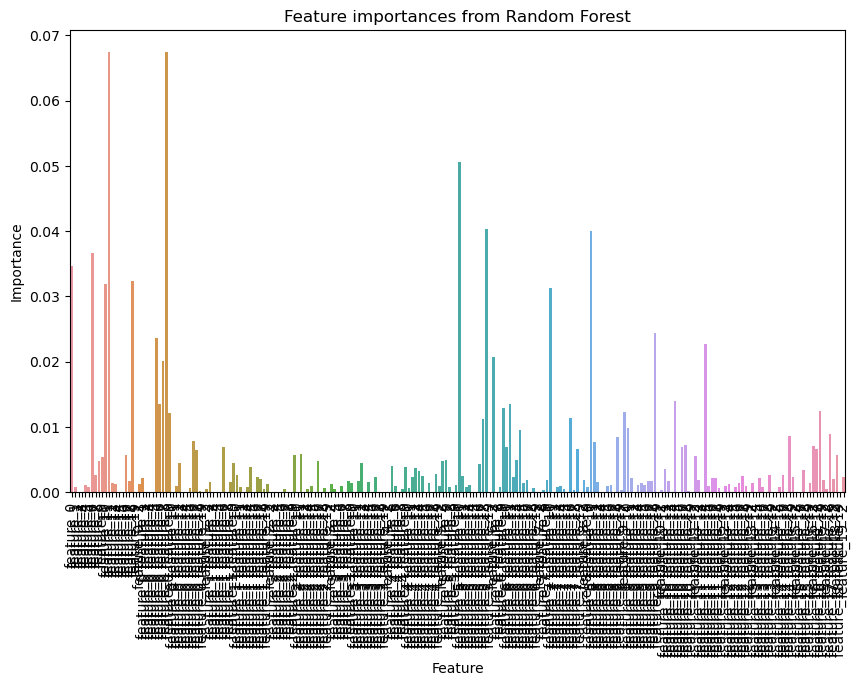

In [29]:
# Plotting feature importances
importances = model.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=importances)
plt.xticks(rotation=90)
plt.title("Feature importances from Random Forest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


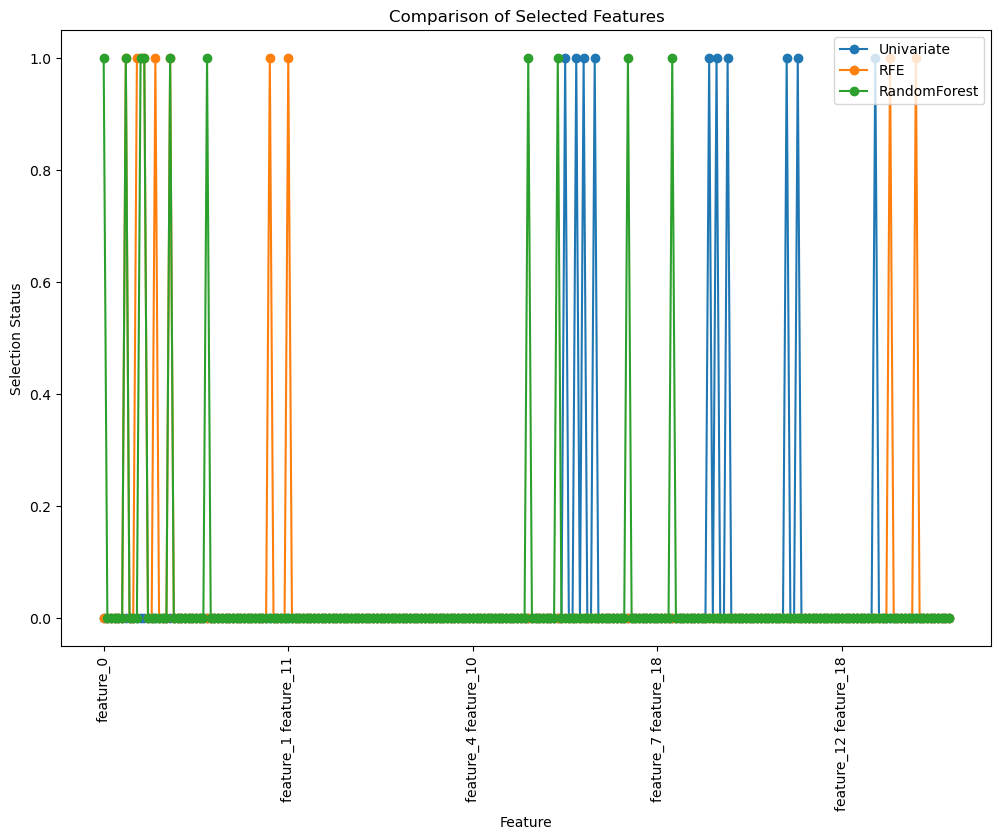

In [30]:
import numpy as np

# Initialize a DataFrame to hold the selection status
selection_matrix = pd.DataFrame(index=feature_names, columns=['Univariate', 'RFE', 'RandomForest'], data=0)

# Mark the selected features
selection_matrix.loc[selected_features, 'Univariate'] = 1
selection_matrix.loc[selected_features_rfe, 'RFE'] = 1
selection_matrix.loc[selected_features_rf, 'RandomForest'] = 1

# Plot the selection matrix
selection_matrix.plot(kind='line', marker='o', figsize=(12, 8))
plt.title("Comparison of Selected Features")
plt.xlabel("Feature")
plt.ylabel("Selection Status")
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()


### Model Building

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df_poly, selected_features, selected_features_rfe, and selected_features_rf are already defined

# Univariate Selection
X_uni = df_poly[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_uni, y, test_size=0.3, random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
univariate_accuracy = accuracy_score(y_test, y_pred)

print("Univariate feature selection accuracy:", univariate_accuracy)

# Recursive Feature Elimination
X_rfe = df_poly[selected_features_rfe]
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rfe_accuracy = accuracy_score(y_test, y_pred)

print("RFE accuracy:", rfe_accuracy)

# Feature Importance from Random Forest
X_rf = df_poly[selected_features_rf]
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)

print("Random Forest feature importance accuracy:", rf_accuracy)


Univariate feature selection accuracy: 1.0
RFE accuracy: 0.9966666666666667
Random Forest feature importance accuracy: 1.0


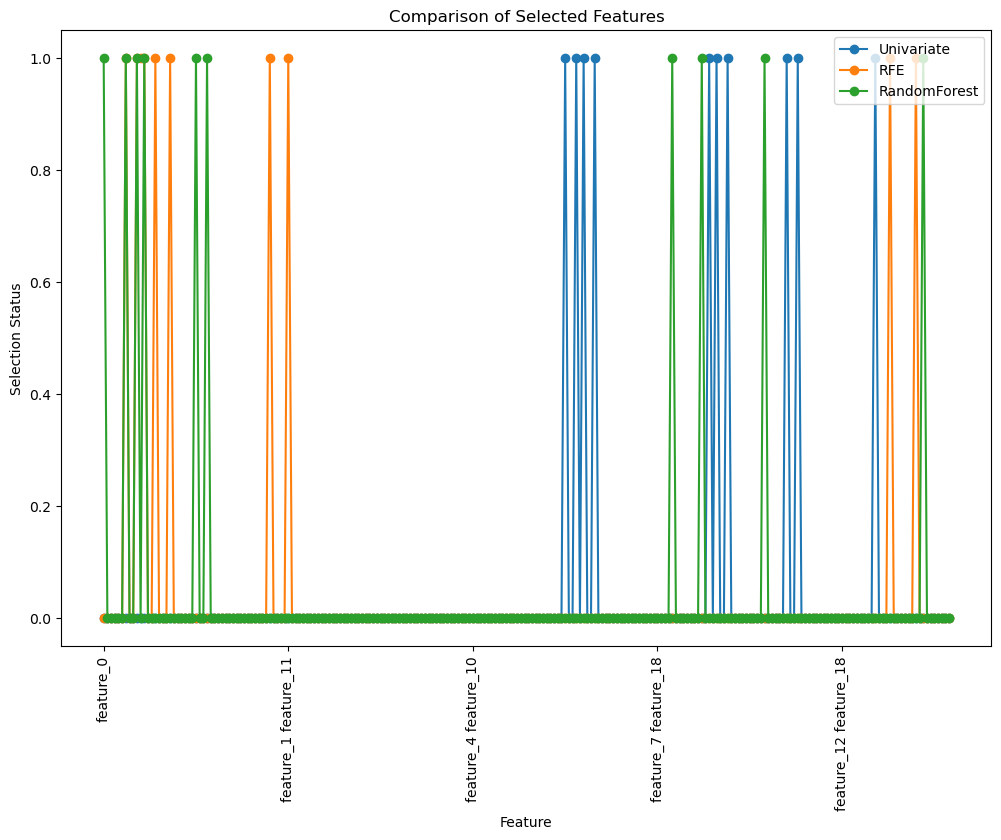

In [37]:
import matplotlib.pyplot as plt

def plot_comparison(selected_features_uni, selected_features_rfe, selected_features_rf):
    feature_names = df_poly.drop('target', axis=1).columns
    
    selection_matrix = pd.DataFrame(index=feature_names, columns=['Univariate', 'RFE', 'RandomForest'], data=0)
    
    selection_matrix.loc[selected_features_uni, 'Univariate'] = 1
    selection_matrix.loc[selected_features_rfe, 'RFE'] = 1
    selection_matrix.loc[selected_features_rf, 'RandomForest'] = 1
    
    selection_matrix.plot(kind='line', marker='o', figsize=(12, 8))
    plt.title("Comparison of Selected Features")
    plt.xlabel("Feature")
    plt.ylabel("Selection Status")
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

plot_comparison(selected_features, selected_features_rfe, selected_features_rf)
